In [211]:
from numpy import *
from numpy.random import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.stats import norm
from PlotFuncs import col_alpha,CurvedText
from PlotFuncs import MySaveFig
%matplotlib inline



def FigSetup(xlab=r'Dark photon mass, $m_X$ [eV]',ylab='Kinetic mixing, $\chi$',\
                 g_min = 1.0e-18,g_max = 1.0e0,\
                 m_min = 1.0e-15,m_max = 1e5,\
                 lw=2.5,lfs=40,tfs=25,tickdir='out',\
                 Grid=False,Shape='Rectangular',mathpazo=True,
                 TopAndRightTicks=False,FrequencyAxis=True,UnitAxis=True):

        plt.rcParams['axes.linewidth'] = lw
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif',size=tfs)

        if mathpazo:
            mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']

        if Shape=='Wide':
            fig = plt.figure(figsize=(16.5,5))
        elif Shape=='Rectangular':
            fig = plt.figure(figsize=(16.5,11))

        ax = fig.add_subplot(111)

        ax.set_xlabel(xlab,fontsize=lfs)
        ax.set_ylabel(ylab,fontsize=lfs)

        ax.tick_params(which='major',direction=tickdir,width=2.5,length=13,right=TopAndRightTicks,top=TopAndRightTicks,pad=7)
        ax.tick_params(which='minor',direction=tickdir,width=1,length=10,right=TopAndRightTicks,top=TopAndRightTicks)


        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([m_min,m_max])
        ax.set_ylim([g_min,g_max])

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.xaxis.set_major_locator(locmaj)
        ax.xaxis.set_minor_locator(locmin)
        ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.yaxis.set_major_locator(locmaj)
        ax.yaxis.set_minor_locator(locmin)
        ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        if Shape=='Rectangular':
            plt.xticks(rotation=20)

        if Grid:
            ax.grid(zorder=0)

        if FrequencyAxis:
            ax2 = ax.twiny()
            ax2.set_xlim([m_min*241.8*1e12,m_max*241.8*1e12])
            

            
            ax2.set_xscale('log')
            ax2.tick_params(which='major',direction=tickdir,width=2.5,length=13,pad=7)
            ax2.tick_params(which='minor',direction=tickdir,width=1,length=10)
            locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
            locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
            ax2.xaxis.set_major_locator(locmaj)
            ax2.xaxis.set_minor_locator(locmin)
            ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
            
            ax2.set_xticks([1e0,1e3,1e6,1e9,1e12,1*241.8*1e12,1000*241.8*1e12])
            ax2.set_xticklabels(['Hz','kHz','MHz','GHz','THz','eV','keV'])
            
            plt.sca(ax)
        return fig,ax
    
    
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]

    

    
def Haloscopes(ax,col=[0.75, 0.2, 0.2],fs=17,projection=True,text_on=True):
    y2 = ax.get_ylim()[1]
    zo = 0.3
#     dat = loadtxt("limit_data/AxionPhoton/RBF_UF_Haloscopes.txt")
#     dat[:,1] = sqrt((dat[:,1]))/sqrt(0.0025)
#     plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=zo,alpha=1.0)
    
    costh = sqrt(1/3)
    
    
    B = 7.6/1.444e-3 # eV^2
    dat = loadtxt("limit_data/AxionPhoton/ADMX.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    dat = loadtxt("limit_data/AxionPhoton/ADMX2018.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/ADMX2019_1.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/ADMX2019_2.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/ADMX_Sidecar.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    
    dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_highres.txt")
    B = 9/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_2020_highres.txt")
    B = 9/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    
    dat = loadtxt("limit_data/AxionPhoton/CAPP-8TB.txt")
    B = 8/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    dat = loadtxt("limit_data/AxionPhoton/ORGAN.txt")
    B = 14/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/QUAX.txt")
    B = 8.1/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    if text_on: 
        plt.text(1.5e-6,0.5e-14,r'{\bf ADMX}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e-5,0.35e-14,r'{\bf CAPP}',fontsize=fs-2,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.19e-4,0.7e-15,r'{\bf HAYSTAC}',fontsize=fs-5,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')

    return
    
    
def StellarBounds(ax,fs=20,text_on=True):
    y2 = ax.get_ylim()[1]
    # Stellar physics constraints

    # Globular clusters 
    HB_col = [0.01, 0.75, 0.24]
    HB = loadtxt("limit_data/DarkPhoton/RG.txt")
    plt.plot(HB[:,0],HB[:,1],color='k',alpha=0.5,zorder=0.9,lw=2)
    plt.fill_between(HB[:,0],HB[:,1],y2=y2,edgecolor=None,facecolor=HB_col,zorder=0.9)
    
    # Globular clusters 
    HB_col = 'DarkGreen'
    HB = loadtxt("limit_data/DarkPhoton/HB.txt")
    plt.plot(HB[:,0],HB[:,1],color='k',alpha=0.5,zorder=0.95,lw=2)
    plt.fill_between(HB[:,0],HB[:,1],y2=y2,edgecolor=None,facecolor=HB_col,zorder=0.95)

    # Solar bound
    Solar_col = 'ForestGreen'
    Solar = loadtxt("limit_data/DarkPhoton/Solar.txt")
    plt.plot(Solar[:,0],Solar[:,1],color='k',alpha=0.5,zorder=1,lw=2)
    plt.fill_between(Solar[:,0],Solar[:,1],y2=y2,edgecolor=None,facecolor=Solar_col,zorder=1)

    if text_on:
        plt.text(1e2*(1-0.01),1.5e-14*(1+0.05),r'{\bf Solar}',fontsize=fs,color='k',rotation=-39,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e3*(1-0.01),0.7e-14*(1+0.05),r'{\bf HB}',fontsize=fs,color='k',rotation=-36,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e4*(1-0.01),0.7e-14*(1+0.05),r'{\bf RG}',fontsize=fs,color='k',rotation=-35,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e2,1.5e-14,r'{\bf Solar}',fontsize=fs,color='w',rotation=-39,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e3,0.7e-14,r'{\bf HB}',fontsize=fs,color='w',rotation=-36,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e4,0.7e-14,r'{\bf RG}',fontsize=fs,color='w',rotation=-35,rotation_mode='anchor',ha='center',va='center')
    return

    
def Xenon(ax,col='crimson',fs=23,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Xenon1T.txt")
    plt.plot(1e3*dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(1e3*dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    
    dat = loadtxt("limit_data/DarkPhoton/Xenon100.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    if text_on: 
        plt.text(5e2,3e-17,r'{\bf XENON}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
    
    return





def DAMIC(ax,col='salmon',fs=24,text_on=True):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM_combined.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/DAMIC.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]
    dat[-1,1] = y2[-1]
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.2,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.2)
    if text_on: 
        plt.text(5e-1,1e-14,r'{\bf DAMIC}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([5e0,1e1],[3e-14,6e-14],'k-',lw=2.5,color=col)
    return


def FUNK(ax,col='red',fs=22,text_on=True):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM_combined.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/FUNK.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.3,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.3)
    if text_on: 
        plt.text(5e-1,1e-13,r'{\bf FUNK}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([9e-1,3e0],[3e-13,9e-13],'k-',lw=2.5,color=col)
    return

def SENSEI(ax,col='firebrick',fs=23,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SENSEI.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1)
    if text_on: 
        plt.text(2e0,1e-15,r'{\bf SENSEI}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([7e0,1e1],[3e-15,9e-15],'k-',lw=2.5,color=col)
    return


def Nanowire(ax,col='pink',fs=22,text_on=True):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM_combined.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/WSi_Nanowire.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.3,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.3)
    if text_on: 
        plt.text(5e-4,1e-10,r'{\bf WSi Nanowire}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([9e-3,3e-3],[3e-10,9e-10],'k-',lw=2.5,color=col)
    return



def Tokyo(ax,col='darkred',fs=16,text_on=True):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM_combined.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Dish.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.4,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.4)

    
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Knirck.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=1e0,edgecolor='k',facecolor=col,zorder=1.09)
    
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Tomita.txt")
    plt.plot([dat[1,0],dat[1,0]],[dat[1,1],1e0],'-',color=col,lw=3,zorder=0.2)
    if text_on: 
        plt.text(1.3e-4,4e-11,r'{\bf Tokyo}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.9e-3,4e-10,r'{\bf Tokyo}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e-1,4e-12,r'{\bf Tokyo}',fontsize=fs+4,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.plot([5e-1,4e0],[5e-12,8e-12],'-',lw=2.5,color=col)
    return
    
    

def Coulomb(ax,col='crimson',fs=20,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Coulomb.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.07,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.07)
    if text_on: 
        plt.text(0.7e-8*(1-0.01),4e-6*(1+0.05),r'{\bf Coulomb}',fontsize=fs,color='k',rotation=-35,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.7e-8,4e-6,r'{\bf Coulomb}',fontsize=fs,color='w',rotation=-35,rotation_mode='anchor',ha='center',va='center')
    return

def CROWS(ax,col=[0.5, 0.0, 0.13],fs=23,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/CROWS.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.08,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.08)
    if text_on: 
        plt.text(1.2e-6*(1-0.01),5e-7*(1+0.05),r'{\bf CROWS}',fontsize=fs,color='k',rotation=-55,rotation_mode='anchor',ha='center',va='center')
        plt.text(1.2e-6,5e-7,r'{\bf CROWS}',fontsize=fs,color='w',rotation=-55,rotation_mode='anchor',ha='center',va='center')
    return

def LSW(ax,col=[0.4, 0.2, 0.2],fs=27,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/LSW.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.09,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.09)
    if text_on: 
        plt.text(0.6e-4*(1-0.02),2e-5*(1+0.08),r'{\bf ALPS}',fontsize=fs,color='k',rotation=-54,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.6e-4,2e-5,r'{\bf ALPS}',fontsize=fs,color='w',rotation=-54,rotation_mode='anchor',ha='center',va='center')

    return

def Jupiter(ax,col='Green',fs=17,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Jupiter.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=2,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=2)
    if text_on: 
        plt.text(1e-14*(1-0.02),3e-1*(1+0.07),r'{\bf Jupiter}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e-14,3e-1,r'{\bf Jupiter}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    return

def Earth(ax,col='DarkGreen',fs=17,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Earth.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.9,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.9)
    if text_on: 
        plt.text(4e-13*(1-0.01),2e-1*(1+0.05),r'{\bf Earth}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(4e-13,2e-1,r'{\bf Earth}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    return

def CAST(ax,col=[0.5, 0.0, 0.13],fs=27,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/CAST.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.1,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.1)
    if text_on: 
        plt.text(0.6e-3*(1-0.01),0.3e-4*(1+0.08),r'{\bf CAST}',fontsize=fs,color='k',rotation=-57,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.6e-3,0.3e-4,r'{\bf CAST}',fontsize=fs,color='w',rotation=-57,rotation_mode='anchor',ha='center',va='center')
    return


def Rydberg(ax,col=[0.55, 0.05, 0.1],fs=27,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Rydberg.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.11,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.11)
    if text_on: 
        plt.text(0.2e2*(1-0.01),1.2e-3*(1+0.08),r'{\bf Rydberg}',fontsize=fs,color='k',rotation=-30,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.2e2,1.2e-3,r'{\bf Rydberg}',fontsize=fs,color='w',rotation=-30,rotation_mode='anchor',ha='center',va='center')
    return

def SHUKET(ax,col='darkred',fs=15,text_on=True,edge_on=False,lw=0.8):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SHUKET.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    if edge_on:
        plt.plot(dat[:,0],dat[:,1],'k-',lw=lw,zorder=0.2)
    if text_on: 
        plt.text(4e-5,7e-12,r'{\bf SHUKET}',fontsize=fs,color=col,rotation=-90,rotation_mode='anchor',ha='center',va='center')
    return

def DarkEfield(ax,col='darkred',fs=17,text_on=True,edge_on=False,lw=0.8):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/DarkEfield.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    if edge_on:
        plt.plot(dat[:,0],dat[:,1],'k-',lw=lw,zorder=0.2)
    if text_on: 
        plt.text(1e-7,0.2e-12,r'{\bf Dark}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(2e-7,0.2e-12,r'{\bf E-field}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
    return

def WISPDMX(ax,col='crimson',fs=13,text_on=True,edge_on=False,lw=0.8):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/WISPDMX.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    if edge_on:
        plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.2,lw=lw,zorder=0.2)
    if text_on: 
        plt.text(7e-7,3.2e-12,r'{\bf WISP}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(7e-7,1.3e-12,r'{\bf DMX}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')

    return

def SQuAD(ax,col='darkred',fs=13,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SQuAD.txt")
    plt.plot([dat[0,0],dat[0,0]],[y2,dat[0,1]],lw=0.5,color=col,alpha=1,zorder=0.2)
    if text_on: 
        plt.text(36e-6,1e-14,r'{\bf SQuAD}',fontsize=fs,color=col,rotation=-90,rotation_mode='anchor',ha='center',va='center')
    return

def DarkMatter(ax,Witte_col='royalblue',Caputo_col='dodgerblue',Arias_col='navy',fs=20,projection=True,text_on=True):
    y2 = ax.get_ylim()[1]
    zo = 0.3
    
    # Combined limits
    dat = loadtxt("limit_data/DarkPhoton/DM_combined.txt")
    plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=zo+0.1,lw=2.5,path_effects=pek)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor='lightgray',zorder=zo,alpha=1.0)
    plt.plot([1e-16,dat[0,0]],[dat[0,1],dat[0,1]],'--',color='w',alpha=1,zorder=zo+0.1,lw=2.5,path_effects=pek)
    plt.fill_between([1e-16,dat[0,0]],[dat[0,1],dat[0,1]],y2=y2,edgecolor=None,facecolor='lightgray',zorder=zo+0.1,alpha=1.0)
    plt.plot(dat[40:,0],dat[40:,1],'--',color='w',alpha=1,lw=2.5,zorder=1000)
    
    # Individual limits
    dat2 = loadtxt("limit_data/DarkPhoton/Cosmology_Witte_inhomogeneous.txt")
    dat4 = loadtxt("limit_data/DarkPhoton/Cosmology_Caputo_HeII.txt",delimiter=',')
    dat5 = loadtxt("limit_data/DarkPhoton/Cosmology_Arias.txt")
    
    plt.fill_between(dat2[:,0],dat2[:,1],y2=y2,edgecolor='k',facecolor=Witte_col,zorder=0.305,alpha=0.8)
    plt.fill_between(dat4[:,0],dat4[:,1],y2=y2,edgecolor='k',facecolor=Caputo_col,zorder=0.305,alpha=0.8)
    plt.fill_between(dat5[:,0],dat5[:,1],y2=y2,edgecolor='k',facecolor=Arias_col,zorder=0.306,alpha=1)

    if text_on: 
        plt.gcf().text(0.21,0.42,r'{\bf DPDM} HeII',fontsize=15,color='w',ha='center')
        plt.gcf().text(0.21,0.4,r'Reionisation',fontsize=15,color='w',ha='center')
        plt.gcf().text(0.21,0.38,r'(Caputo et al.)',fontsize=13,color='w',ha='center')

        plt.gcf().text(0.297,0.37,r'{\bf DPDM}',fontsize=17,color='w',ha='center')
        plt.gcf().text(0.297,0.35,r'(Witte et al.)',fontsize=13,color='w',ha='center')

        plt.gcf().text(0.435,0.48,r'{\bf DPDM}',fontsize=17,color='w',ha='center')
        plt.gcf().text(0.435,0.46,r'(Arias et al.)',fontsize=15,color='w',ha='center')

        plt.arrow(0.24, 0.26, 0, -0.045, transform=fig.transFigure,figure=fig,
          length_includes_head=True,lw=2.5,
          head_width=0.012, head_length=0.028, overhang=0.13,
          edgecolor='k',facecolor='w',clip_on=False)
        plt.text(1e-12,0.4e-16,r'{\bf Dark}',fontsize=27,ha='center')
        plt.text(1e-12,0.7e-17,r'{\bf photon DM}',fontsize=27,ha='center')
    return
    
def COBEFIRAS(ax,col='steelblue',text_on=True):
    y2 = ax.get_ylim()[1]   
    dat3 = loadtxt("limit_data/DarkPhoton/COBEFIRAS_Caputo.txt",delimiter=',')
    plt.fill_between(dat3[:,0],dat3[:,1],y2=y2,edgecolor='k',facecolor=col,zorder=0.5,alpha=1)
    if text_on: 
        plt.gcf().text(0.24,0.7,r'COBE/FIRAS',fontsize=20,color='w',ha='center')
        plt.gcf().text(0.24,0.67,r'$\gamma \rightarrow X$',fontsize=20,color='w',ha='center')
    return


def IGM(ax,col='seagreen',fs=27,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/IGM.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.49,lw=2)

    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.49)
    
    if text_on: 
        plt.text(3e-12*(1-0.05),0.05e-7*(1+0.07),r'{\bf IGM}',fontsize=fs,color='k',rotation=-39,rotation_mode='anchor',ha='center',va='center')
        plt.text(3e-12,0.05e-7,r'{\bf IGM}',fontsize=fs,color='w',rotation=-39,rotation_mode='anchor',ha='center',va='center')
    return

def LeoT(ax,col='limegreen',fs=25,text_on=True):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/LeoT.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.48,zorder=0.306,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.306)
    
    if text_on: 
        plt.text(6e-13*(1-0.07),0.4e-9*(1+0.1),r'{\bf LeoT}',fontsize=fs,color='k',rotation=-39,rotation_mode='anchor',ha='center',va='center')
        plt.text(6e-13,0.4e-9,r'{\bf LeoT}',fontsize=fs,color='w',rotation=-39,rotation_mode='anchor',ha='center',va='center')
    return


fig,ax = FigSetup()

DarkMatter(ax)
Haloscopes(ax)
StellarBounds(ax)

Xenon(ax)
DAMIC(ax)
SENSEI(ax)
FUNK(ax)
Tokyo(ax)
SHUKET(ax)
DarkEfield(ax)
WISPDMX(ax)
Coulomb(ax)
CROWS(ax)
Rydberg(ax)
SQuAD(ax)

COBEFIRAS(ax)
LSW(ax)
CAST(ax)
Jupiter(ax)
Earth(ax)
IGM(ax)
LeoT(ax)




MySaveFig(fig,'DarkPhoton')

SyntaxError: keyword argument repeated (<ipython-input-211-462be22998bf>, line 389)

Text(0.89, 0.15, '$\\rho_0 = 0.45$ GeV cm$^{-3}$')

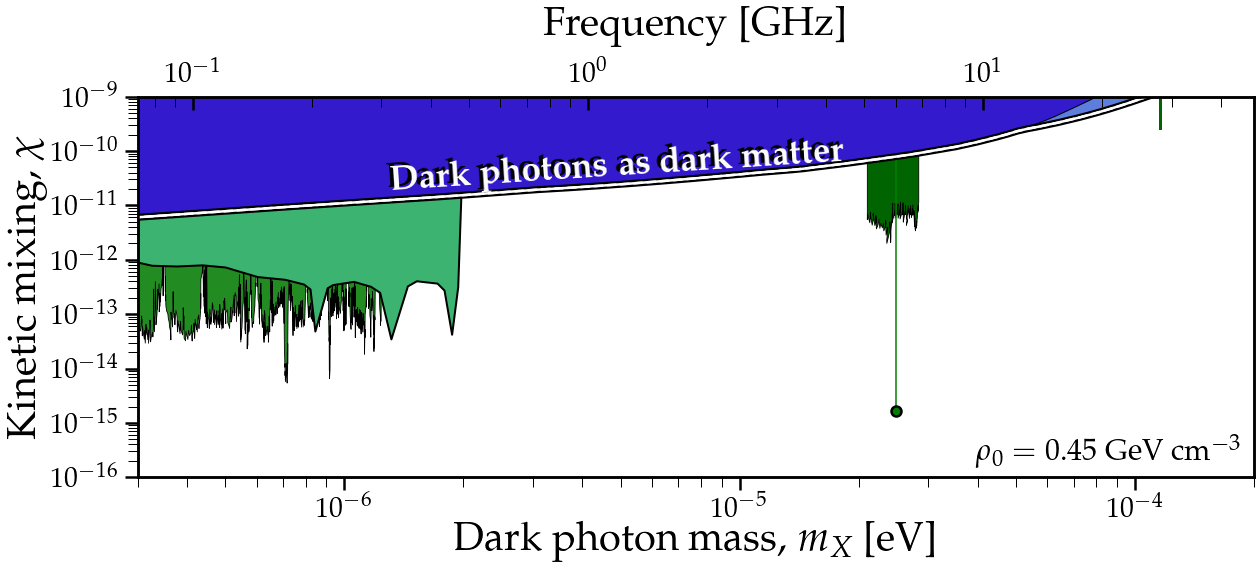

In [236]:

def FigSetup(xlab=r'Dark photon mass, $m_X$ [eV]',ylab='Kinetic mixing, $\chi$',\
                 chi_min = 1.0e-18,chi_max = 1.0e0,\
                 m_min = 1.0e-15,m_max = 1e5,\
                 lw=2.5,lfs=40,tfs=25,tickdir='out',\
                 Grid=False,Shape='Rectangular',mathpazo=True,\
                 TopAndRightTicks=False,FrequencyAxis=True,FrequencyLabels=True,UnitAxis=True,f_rescale=1,\
                tick_rotation = 20,width=20,height=10,upper_tickdir='out'):

        plt.rcParams['axes.linewidth'] = lw
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif',size=tfs)

        if mathpazo:
            mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']

        if Shape=='Wide':
            fig = plt.figure(figsize=(16.5,5))
        elif Shape=='Rectangular':
            fig = plt.figure(figsize=(16.5,11))
        elif Shape=='Custom':
            fig = plt.figure(figsize=(width,height))

        ax = fig.add_subplot(111)

        ax.set_xlabel(xlab,fontsize=lfs)
        ax.set_ylabel(ylab,fontsize=lfs)

        ax.tick_params(which='major',direction=tickdir,width=2.5,length=13,right=TopAndRightTicks,top=TopAndRightTicks,pad=7)
        ax.tick_params(which='minor',direction=tickdir,width=1,length=10,right=TopAndRightTicks,top=TopAndRightTicks)


        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([m_min,m_max])
        ax.set_ylim([chi_min,chi_max])

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.xaxis.set_major_locator(locmaj)
        ax.xaxis.set_minor_locator(locmin)
        ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.yaxis.set_major_locator(locmaj)
        ax.yaxis.set_minor_locator(locmin)
        ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        if Shape=='Rectangular':
            plt.xticks(rotation=tick_rotation)

        if Grid:
            ax.grid(zorder=0)

        if FrequencyAxis:
            ax2 = ax.twiny()
            

            
            ax2.set_xscale('log')
            ax2.tick_params(which='major',direction=upper_tickdir,width=2.5,length=13,pad=7)
            ax2.tick_params(which='minor',direction=upper_tickdir,width=1,length=10)
            locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
            locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
            ax2.xaxis.set_major_locator(locmaj)
            ax2.xaxis.set_minor_locator(locmin)
            ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
            
            if FrequencyLabels:
                ax2.set_xticks([1e0,1e3,1e6,1e9,1e12,1*241.8*1e12,1000*241.8*1e12])
                ax2.set_xticklabels(['Hz','kHz','MHz','GHz','THz','eV','keV'])
            ax2.set_xlim([m_min*241.8*1e12/f_rescale,m_max*241.8*1e12/f_rescale])

            plt.sca(ax)
        return fig,ax
    
m_min = 3e-7
m_max = 2e-4
fig,ax = FigSetup(m_min=m_min,m_max=m_max,chi_min=1e-16,chi_max=1e-9,\
                  FrequencyLabels=False,FrequencyAxis=True,upper_tickdir='in',\
                  Shape='Custom',width=20,height=7,f_rescale=1e9,tfs=28)
plt.title(r'Frequency [GHz]',ha='center',fontsize=40,pad=27)


def SHUKET(ax,col='darkred',fs=15,text_on=True,edge_on=False,lw=0.8):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SHUKET.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    if edge_on:
        plt.plot(dat[:,0],dat[:,1],'k-',lw=lw,zorder=0.2)
    if text_on: 
        plt.text(4e-5,7e-12,r'{\bf SHUKET}',fontsize=fs,color=col,rotation=-90,rotation_mode='anchor',ha='center',va='center')
    return

def DarkEfield(ax,col='darkred',fs=17,text_on=True,edge_on=False,lw=0.8):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/DarkEfield.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    if edge_on:
        plt.plot(dat[:,0],dat[:,1],'k-',lw=lw,zorder=0.2)
    if text_on: 
        plt.text(1e-7,0.2e-12,r'{\bf Dark}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        plt.text(2e-7,0.2e-12,r'{\bf E-field}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
    return

def WISPDMX(ax,col='crimson',fs=13,text_on=True,edge_on=False,lw=0.8):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/WISPDMX.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.201)
    if edge_on:
        plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.201,lw=lw)
    if text_on: 
        plt.text(7e-7,3.2e-12,r'{\bf WISP}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
        plt.text(7e-7,1.3e-12,r'{\bf DMX}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')

    return

def SQuAD(ax,col='darkred',fs=13,text_on=True,lw=0.5,point_on=True,ms=10):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SQuAD.txt")
    plt.plot([dat[0,0],dat[0,0]],[y2,dat[0,1]],lw=lw,color=col,alpha=1,zorder=0.2)
    if point_on:
        plt.plot(dat[0,0],dat[0,1],'o',mfc=col,mec='k',mew=lw+1,zorder=0.2,markersize=ms)
    if text_on: 
        plt.text(36e-6,1e-14,r'{\bf SQuAD}',fontsize=fs,color=col,rotation=-90,rotation_mode='anchor',ha='center',va='center')
    return


DarkMatter(ax,text_on=False,Arias_col=[0.2,0.1,0.8])
#Haloscopes(ax,text_on=False)
StellarBounds(ax,text_on=False)


Tokyo(ax,text_on=False,col='darkgreen')
SHUKET(ax,text_on=False,edge_on=True,col='darkgreen')
DarkEfield(ax,text_on=False,edge_on=True,col='ForestGreen')
WISPDMX(ax,text_on=False,edge_on=True,col='mediumseagreen',lw=2)
SQuAD(ax,text_on=False,col=[0,0.5,0],point_on=True,lw=1.5)

plt.gcf().text(0.3*(1-0.01),0.695*(1+0.01),r'{\bf Dark photons as dark matter}',color='k',fontsize=35,rotation=3.7)
plt.gcf().text(0.3,0.695,r'{\bf Dark photons as dark matter}',color='w',fontsize=35,rotation=3.7)
plt.gcf().text(0.89,0.15,r'$\rho_0 = 0.45$ GeV cm$^{-3}$',fontsize=30,ha='right')




y2 = ax.get_ylim()[1]
costh = sqrt(1/3)

HAYSTAC_col = 'orangered'
CAPP_col = [1, 0.1, 0.37]
QUAX_col = [0.6,0.1,0.3]
ADMX_col = 'crimson'


B = 7.6
dat = loadtxt("limit_data/AxionPhoton/ADMX.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=ADMX_col,zorder=0.1)

B = 6.8
dat = loadtxt("limit_data/AxionPhoton/ADMX2018.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=ADMX_col,zorder=0.1)

B = 7.6
dat = loadtxt("limit_data/AxionPhoton/ADMX2019_1.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=ADMX_col,zorder=0.1)

B = 7.6
dat = loadtxt("limit_data/AxionPhoton/ADMX2019_2.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=ADMX_col,zorder=0.1)

B = 3.11
dat = loadtxt("limit_data/AxionPhoton/ADMX_Sidecar.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=ADMX_col,zorder=0.1)

B = 9
dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_highres.txt")
B = 9/1.444e-3
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=HAYSTAC_col,zorder=0.1)

B = 9
dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_2020_highres.txt")
B = 9
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=HAYSTAC_col,zorder=0.1)


B = 7.8
dat = loadtxt("limit_data/AxionPhoton/CAPP-8TB.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=CAPP_col,zorder=0.1)

B = 7.9
dat = loadtxt("limit_data/AxionPhoton/CAPP_2020.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=CAPP_col,zorder=0.1)

B = 8.1
dat = loadtxt("limit_data/AxionPhoton/QUAX.txt")
dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=QUAX_col,zorder=0.1)



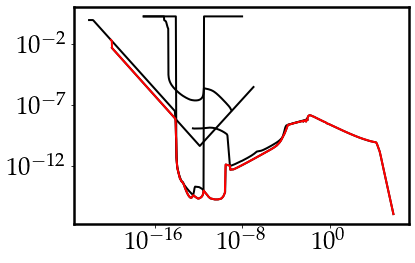

In [152]:
dat1 = loadtxt("limit_data/DarkPhoton/LeoT.txt")
dat2 = loadtxt("limit_data/DarkPhoton/Cosmology_Witte_inhomogeneous.txt")
dat3 = loadtxt("limit_data/DarkPhoton/COBEFIRAS_Caputo.txt",delimiter=',')
dat4 = loadtxt("limit_data/DarkPhoton/Cosmology_Caputo_HeII.txt",delimiter=',')
dat5 = loadtxt("limit_data/DarkPhoton/Cosmology_Arias.txt")

plt.plot(dat1[:,0],dat1[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat2[:,0],dat2[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat3[:,0],dat3[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat4[:,0],dat4[:,1],color='k',alpha=1,zorder=0.5,lw=2)
plt.plot(dat5[:,0],dat5[:,1],color='k',alpha=1,zorder=0.5,lw=2)

mmin = 1e-20
mmax = 698203.561630161
mvals = logspace(log10(mmin),log10(mmax),1000)

chi1 = 10**interp(log10(mvals),log10(dat1[:,0]),log10(dat1[:,1]))
chi1[mvals<dat1[0,0]] = inf
chi1[mvals>dat1[-1,0]] = inf

chi2 = interp(mvals,dat2[:,0],dat2[:,1])
chi2[mvals<dat2[0,0]] = inf
chi2[mvals>dat2[-1,0]] = inf

chi3 = interp(mvals,dat3[:,0],dat3[:,1])
chi3[mvals<dat3[0,0]] = inf
chi3[mvals>dat3[-1,0]] = inf

chi4 = interp(mvals,dat4[:,0],dat4[:,1])
chi4[mvals<dat4[0,0]] = inf
chi4[mvals>dat4[-1,0]] = inf

chi5 = interp(mvals,dat5[:,0],dat5[:,1])
chi5[mvals<dat5[0,0]] = inf
chi5[mvals>dat5[-1,0]] = inf

chi = amin(column_stack((chi1,chi2,chi3,chi4,chi5)),1)

plt.plot(mvals,chi,color='r',alpha=1,zorder=0.5,lw=2)

savetxt('limit_data/DarkPhoton/DM_combined.txt',column_stack((mvals,chi)))

plt.yscale('log')
plt.xscale('log')


In [76]:
chi1

array([1.74750432e-03, 1.65191112e-03, 1.55189327e-03, 1.46635377e-03,
       1.37814072e-03, 1.30159755e-03, 1.22380793e-03, 1.15531494e-03,
       1.08672790e-03, 1.02543843e-03, 9.64975036e-04, 9.10131488e-04,
       8.56838383e-04, 8.07762825e-04, 7.60797673e-04, 7.16883475e-04,
       6.75502126e-04, 6.36206460e-04, 5.99751579e-04, 5.64588706e-04,
       5.32479710e-04, 5.01014977e-04, 4.72739138e-04, 4.44583604e-04,
       4.19688172e-04, 3.94493804e-04, 3.72579038e-04, 3.50034405e-04,
       3.30747417e-04, 3.10611120e-04, 2.93603140e-04, 2.75841152e-04,
       2.60621931e-04, 2.44956642e-04, 2.31338053e-04, 2.17524086e-04,
       2.05337787e-04, 1.93158274e-04, 1.82253629e-04, 1.71516922e-04,
       1.61759137e-04, 1.52295891e-04, 1.43564349e-04, 1.35224943e-04,
       1.27411712e-04, 1.20063968e-04, 1.13072468e-04, 1.06599629e-04,
       1.00343437e-04, 9.46423806e-05, 8.90441631e-05, 8.40238217e-05,
       7.90143784e-05, 7.45943375e-05, 7.01117459e-05, 6.62210081e-05,
      

In [67]:
dat1[:,0]

array([1.00000000e-22, 1.12201845e-22, 1.25892541e-22, 1.41253754e-22,
       1.58489319e-22, 1.77827941e-22, 1.99526231e-22, 2.23872114e-22,
       2.51188643e-22, 2.81838293e-22, 3.16227766e-22, 3.54813389e-22,
       3.98107171e-22, 4.46683592e-22, 5.01187234e-22, 5.62341325e-22,
       6.30957344e-22, 7.07945784e-22, 7.94328235e-22, 8.91250938e-22,
       1.00000000e-21, 1.12201845e-21, 1.25892541e-21, 1.41253754e-21,
       1.58489319e-21, 1.77827941e-21, 1.99526231e-21, 2.23872114e-21,
       2.51188643e-21, 2.81838293e-21, 3.16227766e-21, 3.54813389e-21,
       3.98107171e-21, 4.46683592e-21, 5.01187234e-21, 5.62341325e-21,
       6.30957344e-21, 7.07945784e-21, 7.94328235e-21, 8.91250938e-21,
       1.00000000e-20, 1.12201845e-20, 1.25892541e-20, 1.41253754e-20,
       1.58489319e-20, 1.77827941e-20, 1.99526231e-20, 2.23872114e-20,
       2.51188643e-20, 2.81838293e-20, 3.16227766e-20, 3.54813389e-20,
       3.98107171e-20, 4.46683592e-20, 5.01187234e-20, 5.62341325e-20,
      